In [201]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [200]:
df = pd.read_csv('/content/Salary Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [202]:
df.dropna(subset = ['Age'], inplace=True)

In [205]:
df.duplicated().sum()

0

In [204]:
df.drop_duplicates(inplace=True)

In [206]:
X = df[['Age','Gender', 'Years of Experience', 'Job Title','Education Level']]
y = df['Salary']

# Define the preprocessor
numeric_features = ['Age','Years of Experience']
categorical_features = ['Gender','Job Title','Education Level']

numeric_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='median')) ,('scaler', StandardScaler())  # Standardize numerical data
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical data
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [207]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)





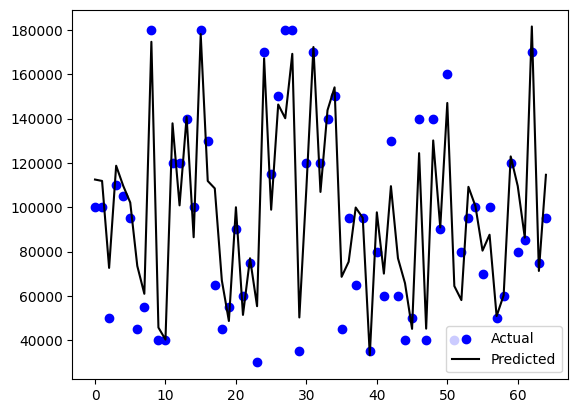

In [209]:

plt.scatter(x= range(len(y_test)), y= y_test,label = 'Actual', color ='b')
plt.plot( y_pred,label = 'Predicted', color ='k')
plt.legend()
plt.show()

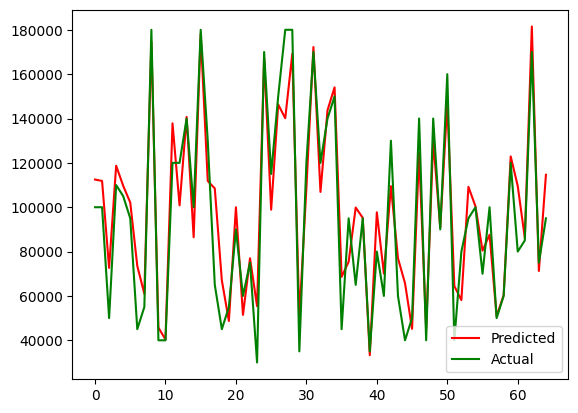

In [213]:
plt.plot(range(len(y_pred)), y_pred, label='Predicted', c='red')
plt.plot(range(len(y_test)), y_test, label='Actual', c='green')
plt.legend()
plt.show()

In [215]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print('R-squared:', r2_score(y_test, y_pred))

MAE: 12303.902497548654
MSE: 251259085.8784073
RMSE: 15851.154086640105
R-squared: 0.8670436995076279
